In [1]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data.
def check_dicom(filename): 

    # Todo
    ds = pydicom.dcmread(filename)
    
    if (ds.BodyPartExamined !='CHEST') or (ds.Modality !='DX') or (ds.PatientPosition not in ['AP','PA']):
        img = None
        print('Image doesn\'t match the criteria of being a valid chest X-ray!\n')
        
    else:
        print('Load file {} ...'.format(filename))
        img = ds.pixel_array
        
    return img
    
    
# This function takes the numpy array output by check_dicom and
# runs the appropriate pre-processing needed for our model input.
def preprocess_image(img, img_size): 
    
    # Todo
    img_mean = np.mean(img)
    img_std = np.std(img)
    proc_img = (img-img_mean) / img_std
    proc_img = np.resize(proc_img,img_size)
    
    return proc_img


# This function loads in our trained model w/ weights and compiles it.
def load_model(model_path, weight_path):
    
    # Todo
    model = keras.models.model_from_json(open(model_path, 'r').read())
    model.load_weights(weight_path)
    
    return model


# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model.
def predict_image(model, img, threshold): 
    
    # Todo
    result = model.predict(img)  
    predict = result[0]
    prediction = "Negative for Pneumonia"
    
    if (predict > threshold):
        prediction = "Positive for Pneumonia"
    
    return prediction 

Load file test1.dcm ...
test1.dcm --------> Positive for Pneumonia


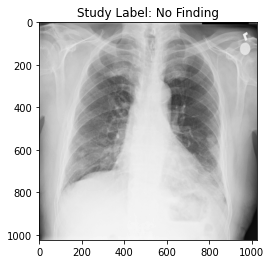

Prediction: Positive for Pneumonia

Load file test2.dcm ...
test2.dcm --------> Positive for Pneumonia


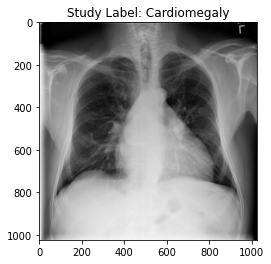

Prediction: Positive for Pneumonia

Load file test3.dcm ...
test3.dcm --------> Positive for Pneumonia


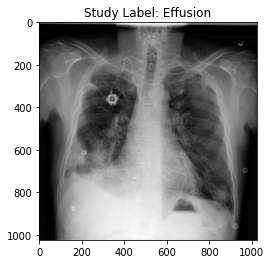

Prediction: Positive for Pneumonia

Image doesn't match the criteria of being a valid chest X-ray!

Image doesn't match the criteria of being a valid chest X-ray!

Image doesn't match the criteria of being a valid chest X-ray!



In [3]:
test_dicoms = ['test1.dcm', 'test2.dcm', 'test3.dcm', 'test4.dcm', 'test5.dcm', 'test6.dcm']

model_path = "./out/VGG16_v2.json" # Path to saved model.
weight_path = "./out/xray_classification_VGG16_v2.best.hdf5" # Path to saved best weights.

IMG_SIZE = (1, 224, 224, 3) # This might be different if you did not use vgg16.
# img_mean = # loads the mean image value they used during training preprocessing.
# img_std = # loads the std dev image value they used during training preprocessing.

my_model = load_model(model_path, weight_path) # loads model.
threshold = .2934# loads the threshold they chose for model classification (threshold at MAX F1-score).

# use the .dcm files to test your prediction.
for i in test_dicoms:
    
    img = np.array([])
    img = check_dicom(i)
    
    if img is None:
        continue
        
    img_proc = preprocess_image(img, IMG_SIZE)
    pred = predict_image(my_model, img_proc, threshold)
    print('{} --------> {}'.format(i, pred))
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Study Label: {pydicom.dcmread(i).StudyDescription}')
    plt.show()
    print(f'Prediction: {pred}\n')

## FDA Validation: Population Descriptions of Patients

In [4]:
my_dicom = pydicom.dcmread(test_dicoms[2])
my_dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.179222148351666120521423991179194552820263
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.179222148351666120521423991179194552820263
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Effusion'
(0010, 0020) Patient 

In [5]:
my_dicom = pydicom.dcmread(test_dicoms[3])
my_dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'No Finding'
(0010, 0020) Patien

In [6]:
# Define lists.
age_list = []
gender_list = []

for i in test_dicoms:    
    ds = pydicom.dcmread(i)
    age_list.append(ds.PatientAge)
    gender_list.append(ds.PatientSex)

In [7]:
## Log the age list.
age_list

['81', '58', '77', '81', '81', '81']

In [8]:
## Log the gender list.
gender_list

['M', 'M', 'M', 'M', 'M', 'M']

In [9]:
## We are done with this notebook!
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}